In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
#import plotly.offline as py
#import plotly.tools as tls

import datetime
from datetime import datetime
import statistics as es 
import csv
import re 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)



Managing only the datasets of these groups. The others groups avaliable on Paper don' t have  tweets information, only users.


In [2]:
#Tweets of datasets
data1=pd.read_csv('genuine/tweets.csv', sep=',')
data2=pd.read_csv('social_spambots_1/tweets.csv', sep=',')
data3=pd.read_csv('social_spambots_2/tweets.csv', sep=',')
data4=pd.read_csv('social_spambots_3/tweets.csv', sep=',')
data5=pd.read_csv('traditional_spambots_1/tweets.csv', sep=',')

to have some idea of the users and tweet's datasets. I'll show some informations

In [4]:
#To take easy the handling, i will transform the datasets in python dictionary
#tweets
d = {} 
d['df1'] = data1.copy()
d['df2'] = data2.copy()
d['df3'] = data3.copy()
d['df4'] = data4.copy()
d['df5'] = data5.copy()
d.keys() 
#Users



dict_keys(['df1', 'df2', 'df3', 'df4', 'df5'])

In [6]:
for x in d.keys():
      print("Shape of  "+x+" ", d[x].shape, "unique users", d[x].drop_duplicates('user_id').shape[0])
print("-----------------------------")
for x in da.keys():
      print("Shape of "+x+" ", da[x].shape, )


Shape of  df1  (2839362, 25) unique users 1084
Shape of  df2  (1610034, 25) unique users 991
Shape of  df3  (428542, 25) unique users 3457
Shape of  df4  (1418557, 25) unique users 464
Shape of  df5  (145094, 25) unique users 1000
-----------------------------
Shape of df1a  (3474, 42)
Shape of df2a  (991, 41)
Shape of df3a  (3457, 40)
Shape of df4a  (464, 41)
Shape of df5a  (1000, 40)


In [7]:
data1.head(1)

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,place,contributors,retweet_count,reply_count,favorite_count,favorited,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,5.939322e+17,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19


In [8]:
data1a.head(1)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,NaN,Tokyo .Japan .,NaN,NaN,1.0,http://pbs.twimg.com/profile_images/5887331863...,https://pbs.twimg.com/profile_banners/15020264...,NaN,https://abs.twimg.com/images/themes/theme1/bg.png,000000,https://pbs.twimg.com/profile_images/588733186...,000000,NaN,000000,http://abs.twimg.com/images/themes/theme1/bg.png,000000,EB0C1F,NaN,NaN,NaN,NaN,NaN,NaN,15years ago X.Lines24,NaN,NaN,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0,0


In [9]:
data1.columns

Index(['id', 'text', 'source', 'user_id', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'in_reply_to_screen_name', 'retweeted_status_id',
       'geo', 'place', 'contributors', 'retweet_count', 'reply_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'num_hashtags', 'num_urls', 'num_mentions', 'created_at', 'timestamp',
       'crawled_at', 'updated'],
      dtype='object')

In [10]:
data1a.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'url', 'lang',
       'time_zone', 'location', 'default_profile', 'default_profile_image',
       'geo_enabled', 'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'profile_background_color', 'profile_link_color', 'utc_offset',
       'is_translator', 'follow_request_sent', 'protected', 'verified',
       'notifications', 'description', 'contributors_enabled', 'following',
       'created_at', 'timestamp', 'crawled_at', 'updated', 'test_set_1',
       'test_set_2'],
      dtype='object')

It´s very importtant to understand the behavior of the users presented in datasets. for this, i will explore the tweets datasets, plotting some graphs.

In [11]:
for x in d.keys():
    print ('Statistics '+x+'\n\n', d[x].user_id.value_counts().describe())


Statistics df1

 count    1083.000000
mean     2621.755309
std      1002.075176
min         3.000000
25%      2317.000000
50%      3187.000000
75%      3215.000000
max      3250.000000
Name: user_id, dtype: float64
Statistics df2

 count     991.000000
mean     1624.655903
std       586.302142
min       110.000000
25%      1306.000000
50%      1387.000000
75%      1630.000000
max      3248.000000
Name: user_id, dtype: float64
Statistics df3

 count    3457.000000
mean      123.963552
std       197.672937
min        38.000000
25%        91.000000
50%       106.000000
75%       121.000000
max      3242.000000
Name: user_id, dtype: float64
Statistics df4

 count     464.000000
mean     3057.234914
std       614.696725
min       111.000000
25%      3209.000000
50%      3223.000000
75%      3238.000000
max      3258.000000
Name: user_id, dtype: float64
Statistics df5

 count    1000.000000
mean      145.094000
std       495.793932
min         1.000000
25%         2.000000
50%        16.0000

In [12]:
#Adiciona Rotulo - Base GroundTruth
#Genuine
d['df1']['type'] = 0
#Robos
d['df2']['type'] = 1
d['df3']['type'] = 2
d['df4']['type'] = 3
d['df5']['type'] = 4

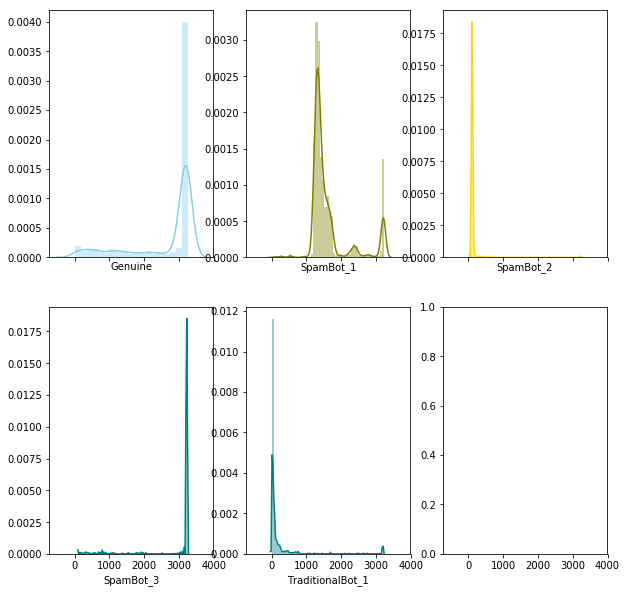

In [13]:
#Histograms
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True)
sns.distplot( d['df1']['user_id'].value_counts() , color="skyblue", axlabel ="Genuine",ax=axes[0, 0])
sns.distplot( d['df2']["user_id"].value_counts() , color="olive", axlabel ="SpamBot_1",ax=axes[0, 1])
sns.distplot( d['df3']["user_id"].value_counts(), color="gold",axlabel ="SpamBot_2", ax=axes[0, 2])
sns.distplot( d['df4']["user_id"].value_counts() , color="teal",axlabel ="SpamBot_3", ax=axes[1, 0])
sns.distplot( d['df5']["user_id"].value_counts() , color="teal", axlabel ="TraditionalBot_1",ax=axes[1, 1])


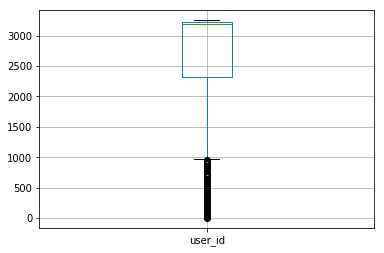

In [14]:
d['df1']['user_id'].value_counts().plot.box(grid='True')  

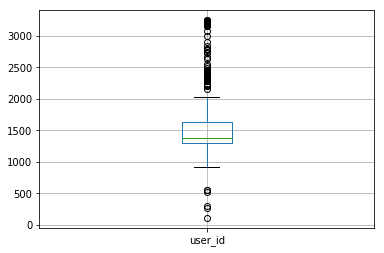

In [15]:
d['df2']['user_id'].value_counts().plot.box(grid='True')  


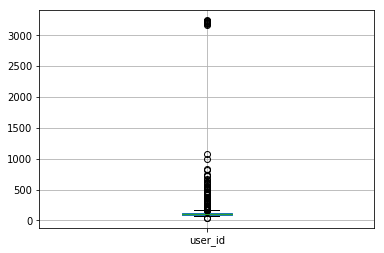

In [16]:
data3['user_id'].value_counts().plot.box(grid='True')  

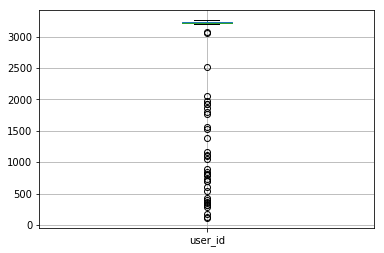

In [17]:
data4['user_id'].value_counts().plot.box(grid='True')  

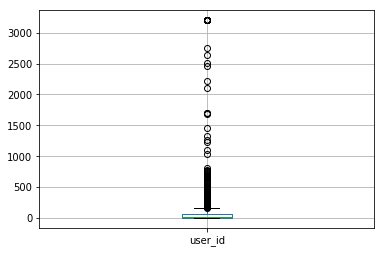

In [18]:
data5['user_id'].value_counts().plot.box(grid='True')  

In [19]:
tweets = pd.concat([d['df1'], d['df2'], d['df3'], d['df4'], d['df5']])
tweets.shape

(6441589, 26)

In [20]:
#verifica situacao de missing data nos conjuntos de tweets
print(tweets.isnull().sum(axis = 0))

id                               0
text                         12987
source                          73
user_id                          1
truncated                  6440836
in_reply_to_status_id            1
in_reply_to_user_id              1
in_reply_to_screen_name    5429614
retweeted_status_id              1
geo                        6441589
place                      6314621
contributors               6441589
retweet_count                    1
reply_count                      1
favorite_count                   1
favorited                  6441589
retweeted                  6441589
possibly_sensitive         6415386
num_hashtags                     1
num_urls                         1
num_mentions                     1
created_at                       1
timestamp                        1
crawled_at                       1
updated                          1
type                             0
dtype: int64


The Tweet object has a long list of ‘root-level’ attributes, including fundamental attributes such as id, created_at, and text. Thererofe, i will drop tweets that have this features as null

In [21]:
#drop userid null
tweets.dropna(subset=['user_id','text','id','created_at' ], inplace=True)

In [23]:
#variaveis identificadas com problemas de missing e nao importantes foram excluidas. Outras preenchidas com vazio ou 0
#pois sao importantes para A extracao de informacoes posterioes.
columns= ['truncated','geo','place','contributors','crawled_at','updated', 'created_at', 'retweeted', 'favorited' ,'possibly_sensitive']
tweets['in_reply_to_screen_name'].fillna(0, inplace=True)
tweets['source'].fillna("", inplace=True)
tweets.drop(columns=columns, axis=1, inplace=True)


In [24]:
print("Shape all tweets and users", tweets.shape, "unique users", tweets.drop_duplicates('user_id').shape[0])

Shape all tweets and users (6428602, 16) unique users 6995


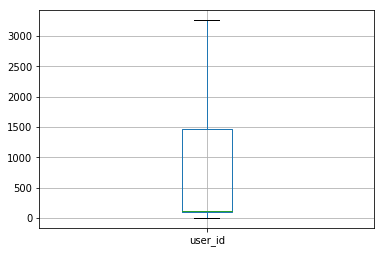

In [25]:
tweets['user_id'].value_counts().plot.box(grid='True')  

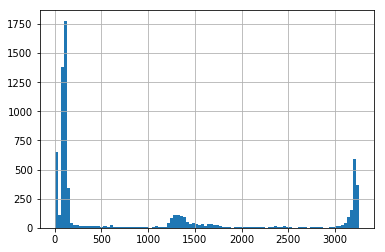

In [26]:
tweets['user_id'].value_counts().hist(bins=100)  

In [27]:
#take o
tweets['n_tweets']=tweets.groupby(['user_id'])['id'].transform('count')
ts=np.quantile(tweets['n_tweets'].values, .05)
tweets.drop(tweets[tweets.n_tweets < ts].index, inplace=True)
print("min twiiter",ts)

min twiiter 129.0


#Base de dados de Tweets filtrada apenas com os usuarios do criterio acima - Manipulacao

In [28]:
print("Shape after cut off ", tweets.shape, "unique users", tweets.drop_duplicates('user_id').shape[0])


Shape after cut off  (5144545, 17) unique users 2872


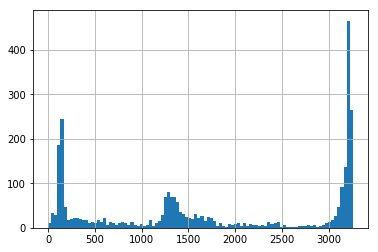

In [29]:
tweets['user_id'].value_counts().hist(bins=100)  

In [30]:
tweets.drop_duplicates('user_id')["type"].value_counts()

0    996
1    837
2    489
3    405
4    145
Name: type, dtype: int64

Antes de comecar, explicaremos alguns planos que nao farao parte, por hora, do foco da preparacao dos dados, mas podem ser incorporados. Importante confrontar essas informações limitadoras com o artigo da base de dados.

poderia explorar a hora (periodo do dia) que o tweet é postado. Mas a base pode ter tweet de todo o mundo, com timezones diferentes. A hora do tweet é dado em duas variaveis: timestamp e created_at, 2 horas de diferencas uma da outra. O campo place e geo, que poderiam ajudar a definir a origem do tweet esta em sua maior parte nulo.

podemos pensar em extrair mais features do texto do tweet, seguindo literatura de analise de conteudo de tweets. 

As informações poderão ser de sentimentos, baseado no uso de dicionarios. Mas com possui tweets de mais uma lingua, tera de verificar a existencia de dicioanarios nos idiomas da base.

Termos positivos e Negativos: utilizar um dicionario de palavas positivas e negativas, criando variaveis binarias. Mesmo problema de idioma.

Emoticons: presenca de emoticons no texto.

Presenca de sinais que a literatura traz como importantes em algumas analise de tweets: exclamacao e interrogacao, principalmente no final do tweet.


obs: A data em todas as bases e controlada pelo created_at, campo oficial da API, O data do traditionalbot esta em um formato desconhecido, dessa forma optoou-se em utilizar o timestamp,variavel do coletor utilizado pelo autor,  presente em todas as bases. O horario esta em um UTC com 2 horas a mais. Como o estudo naoo ira considerar o horario em si de um tweet, mas talvez a sua frequencia no tempo, nao foi corrigido. 



In [31]:
# converte datas tabelas de tweets e cria variaveis temporais - Dia - Mes e Ano 
tweets['timestamp'] = pd.to_datetime(tweets['timestamp'])
tweets['year_month']=tweets['timestamp'].apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
tweets['year_month_day']=tweets['timestamp'].apply(lambda x: '{year}-{month}-{day}'.format(year=x.year, month=x.month, day=x.day))
tweets['year']=tweets['timestamp'].apply(lambda x: '{year}'.format(year=x.year))

    



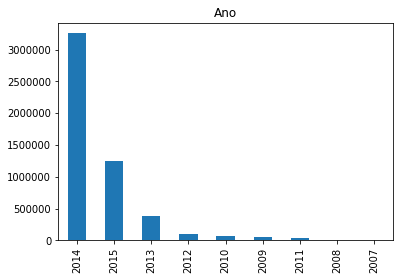

In [32]:
#meses mais ativos para cada amostra de 1 a 5
tweets['year'].value_counts().sort_values(ascending=False).head(12).plot(kind='bar', title='Ano')

Novas features da base tweets

In [33]:
#Soma e media de caracateristicas dos tweets
    #medias
tweets['n_retweet_mean']=tweets.groupby(['user_id'])['retweet_count'].transform('mean')
tweets['n_reply_mean']=tweets.groupby(['user_id'])['reply_count'].transform('mean')
tweets['n_favorite_mean']=tweets.groupby(['user_id'])['favorite_count'].transform('mean')
tweets['n_hashtags_mean']=tweets.groupby(['user_id'])['num_hashtags'].transform('mean')
tweets['n_urls_mean']=tweets.groupby(['user_id'])['num_urls'].transform('mean')
tweets['n_mentions_mean']=tweets.groupby(['user_id'])['num_mentions'].transform('mean')
#tamanho do twitter
tweets['size_twitter'] = tweets['text'].astype('str').apply(len)
#indicador de diferencas de tamanho de um twiiter (dp) e media do tamanho
tweets['media_size_twitter'] = tweets.groupby(['user_id'])['size_twitter'].transform('mean')
#Desvio padrao do tamanho do twiiter - Indica variancia entre todos os tweets
tweets['dp_size_twitter'] = tweets.groupby(['user_id'])['size_twitter'].transform('mad')

In [34]:
#numero de tweets que sao reply de outro.
numero_tweets_reply=""
numero_tweets_no_reply=""
tweets['in_reply_to_screen_name']=tweets['in_reply_to_screen_name'].map(lambda x : 1 if x!=0 else x)
    #Calulando alguns valores
numero_tweets_reply=tweets.groupby('user_id')['in_reply_to_screen_name'].transform('sum')
numero_tweets_no_reply=tweets['n_tweets']-numero_tweets_reply
    #Indices de tipo de tweet por total de tweets
tweets['in_tweets_reply']=numero_tweets_reply/tweets['n_tweets']
tweets['in_tweets_no_reply']= numero_tweets_no_reply/tweets['n_tweets']
    

In [35]:
#Primeiro Tweet, calcular apos mudanca de grao a distancia para data de criacao da conta (timestamp) em dias.
tweets['first_tweet']=tweets.groupby('user_id')['timestamp'].transform('min')
                                                                  

       

In [36]:
#variaveis temporais - (averiguar a criacao de uma varivel que representa a sequencia do twitter)
aux=pd.DataFrame()
tweets['n_tweet_dia']=tweets.groupby(['user_id','year_month_day'])['id'].transform('count') #Calculo do MAX. Dropar
tweets['max_count_tweet_dia']=tweets.groupby('user_id')['n_tweet_dia'].transform('max') # Calculo do In_max. Dropar
    #gera outras variaveis uteis no grao usuario
tweets['in_tweet_max_dia']=tweets['max_count_tweet_dia']/tweets['n_tweets'] #n_tweets_do_dia_mais_postou/n_total_de_tweets
tweets['count_dias_tweet']= tweets.groupby(['user_id'])['year_month_day'].transform(lambda x: x.nunique())#.apply(lambda  x: x.drop_duplicates('year_month_day')['year_month_day'].transform('value_counts')) #quantos dias usou o twiiter
tweets['in_tweet_dia']=tweets['n_tweets']/tweets['count_dias_tweet'] #total de tweets/dia que usouo twitter
    #drop variaveis que nao servirao e que foram criadas aqui
    #d[x].drop(['n_tweet_dia', 'max_count_tweet_dia'], axis=1,inplace=True)

In [37]:
#extrai source - Muito demorado
#for x in d.keys():
#for i in range(len(teste['source'])):
#        m = re.search(r'(>.*)(.*)<', teste['source'][i])
#        try:
#            teste['source'][i]=m.group(0)
#        except AttributeError:
#            teste['source'][i]=teste['source'][i]
        
#tweetsa['source_new'] = tweetsa['source_new'].str.replace(''>' ', case=False)
#d['df3']


In [38]:
#exclui IDs, e features do grao tweet, nao necessarias apos a transformacao para o grao usuario
colunas = ['id','text','source','retweeted_status_id','in_reply_to_status_id','in_reply_to_user_id','in_reply_to_screen_name',
           'reply_count', 'retweet_count','favorite_count','num_hashtags','num_urls','num_mentions',
           'size_twitter', 'timestamp','year_month_day', 'year_month','year','n_tweet_dia','max_count_tweet_dia']
tweets.drop(columns= colunas, axis=1, inplace=True)


In [39]:
tweets.columns

Index(['user_id', 'type', 'n_tweets', 'n_retweet_mean', 'n_reply_mean',
       'n_favorite_mean', 'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean',
       'media_size_twitter', 'dp_size_twitter', 'in_tweets_reply',
       'in_tweets_no_reply', 'first_tweet', 'in_tweet_max_dia',
       'count_dias_tweet', 'in_tweet_dia'],
      dtype='object')

In [41]:
tweets.to_csv('tweets.csv', sep=',')

#######################################################
Base de dados User - Manipulacao

In [3]:
#Users accounts
data1a=pd.read_csv('genuine/users.csv', sep=',')
data2a=pd.read_csv('social_spambots_1/users.csv', sep=',')
data3a=pd.read_csv('social_spambots_2/users.csv', sep=',')
data4a=pd.read_csv('social_spambots_3/users.csv', sep=',')
data5a=pd.read_csv('traditional_spambots_1/users.csv', sep=',')

In [78]:
da = {} 
da['df1a'] = data1a.copy()
da['df2a'] = data2a.copy()
da['df3a'] = data3a.copy()
da['df4a'] = data4a.copy()
da['df5a'] = data5a.copy()

In [79]:
#drop colunas exclusivas  e desconhecidas de algumas bases das tabelas  de usuarios(Test_Set)
da['df1a'].drop(['test_set_1', 'test_set_2'], axis=1, inplace=True)
da['df2a'].drop(['test_set_1'], axis=1, inplace=True)
da['df4a'].drop(['test_set_2'], axis=1, inplace=True)




In [80]:
#Adiciona Rotulo - Base GroundTruth
#Genuine
da['df1a']['Alvo'] = 0
#Robos
da['df2a']['Alvo'] = 1
da['df3a']['Alvo'] = 1
da['df4a']['Alvo'] = 1
da['df5a']['Alvo'] = 1


In [81]:
#concatenar users
users = pd.concat([da['df1a'], da['df2a'], da['df3a'], da['df4a'], da['df5a']])


In [82]:
users.shape


(9386, 41)

In [84]:
#verifica missing
print(users.isnull().sum(axis = 0))


id                                       0
name                                     1
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
url                                   7439
lang                                  1000
time_zone                             5691
location                              5966
default_profile                       8016
default_profile_image                 9326
geo_enabled                           7179
profile_image_url                        0
profile_banner_url                    6087
profile_use_background_image          1396
profile_background_image_url_https    1000
profile_text_color                    1000
profile_image_url_https               1000
profile_sidebar_border_color          1000
profile_background_tile               4135
profile_sid

In [85]:
#drop tabelas de users atributos descontinuados de altissimo missing
columns = ['following','utc_offset', 'time_zone', "lang", 'geo_enabled','follow_request_sent','notifications',
'profile_background_image_url','profile_image_url','profile_background_color','profile_background_image_url_https',
'profile_background_tile','profile_link_color','profile_sidebar_border_color','profile_sidebar_fill_color','profile_text_color',
'profile_use_background_image','is_translator','contributors_enabled', 'updated', 'protected']
users.drop(columns=columns, axis=1, inplace=True)



obs: Utiliza o Timesstamp e nao a variavel oficial de tempo da API "created_at", pois A base df5a posui formato de data created_at desconhecido. A idade da conta sera calculada por meio da data de coleta e a data de criacao da conta. Idade na epoca da coleta.

In [86]:
#transforma a data de criacao e data de coleta das contas para formato data e calcula idade da conta 
users['timestamp'] = pd.to_datetime(users['timestamp'])
users['age'] = pd.to_datetime(users['crawled_at'])-users['timestamp']
users['age'] = users['age'].dt.days
    #exclui crawled-at,
users.drop('crawled_at', axis=1, inplace=True)
    

    

In [87]:
#Variaveis que  por hora, só importam se possuem ou se não possuem.
columns = ['url', 'location', 'default_profile', 'default_profile_image','profile_image_url_https','profile_banner_url', 'verified']
users[columns]=users[columns].notnull().astype('int').astype('str')

Novas features da base usuarios

In [88]:
#features geradas a partir dos relacionamentos da conta
#for x in da.keys():
users['in_following_followers'] = users['friends_count']/users['followers_count']
users['in_following_followers'].fillna(0,inplace=True)
users['in_following_followers'].replace(np.inf, 0,inplace=True)
    


In [89]:
#da['df5a']['in_following_followers'].describe()

In [90]:
#preenche com 0 twiiter sem descricao, sem nome de exibicao, sem url e sem locatiom,  para contagem e criacao de novas featuresn(tamanho do nome e da descricao)
#for x in da.keys():
users['description'].fillna("",inplace=True)
users['name'].fillna("",inplace=True)
#users['url']

In [119]:
users['n_alfa_sname']=0
users['n_number_sname']=0
users['size_sname']=users['screen_name'].astype('str').apply(len)
users['size_description']=users['description'].astype('str').apply(len)
users['size_name']=users['name'].astype('str').apply(len)

In [ ]:
i=0
for y in users['screen_name']:
    print("nome",y)
    a=n=0
    for c in y:
        print("caracter",c)
        s = c.isdigit()
        if s: #se é digito, soma 1
            n+=1
        else:
            a+=1
        
        print("numero",n, "alfa",a)
    print('antes',i)
    users['n_alfa_sname'].iloc[i]=a    
    users['n_number_sname'].iloc[i]=n
    print('depois',i)
    i+=1
    print('prox pos',i)

        

obs: criando indices pata quantidade de numeros nos nomes - Sera exluido a quantidae de alfa da base, e tb nao sera calculado o indice para esta variavel, pois tera uma alta correlacao com indice de numeros. (um aumenta o outro diminui). como a literatura diz que numeros podem identificar robos, preferiu-se manter essa informacao, atraves do seu idice (o n_number_sname tb sera excluido). Mas é importante mencionar que a informação da quantidade de alfa ja esta contida no indice de numeros, preservado na base.

In [123]:
#criacao indice de quantidade de numeros
#for x in da.keys():
users['in_number_sname'] = users['n_number_sname']/users['size_sname']


In [124]:
#exclui outras features da tabela de usuarios que geraram outras variaveis pra representa-las - n_alfa_sname nem usou :(
colunas = ['name', 'screen_name', 'created_at','description', 'n_alfa_sname' ,'n_number_sname', 
           'n_number_sname', 'n_alfa_sname']
#for x in da.keys():
users.drop(columns= colunas, axis=1, inplace=True)

In [125]:
#renomeia id da base de usuarios para user_id (mesmo nome da tabela tweet)
users.rename(columns= {'id': 'user_id'}, inplace=True)


In [126]:
users.to_csv("users.cv", sep=',')

In [ ]:
#verificar a consistencia das variaveis, escolhido um usuario com poucos tweets e analisar se estao corretas
#d[x].loc[d[x]['user_id']==105449543]

Fim de tratamento individual das bases - Inicio Merge

In [127]:
#coloca tabela tweets no grao users
#for x in d.keys():
tweets=tweets.drop_duplicates('user_id')


In [151]:
################## ate aqui
#merge das tabelas users com tweet 
database=pd.merge(users, tweets, on= 'user_id')


In [152]:
database.columns

Index(['user_id', 'statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'location',
       'default_profile', 'default_profile_image', 'profile_banner_url',
       'profile_image_url_https', 'verified', 'timestamp', 'Alvo', 'age',
       'in_following_followers', 'size_sname', 'size_description', 'size_name',
       'in_number_sname', 'type', 'n_tweets', 'n_retweet_mean', 'n_reply_mean',
       'n_favorite_mean', 'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean',
       'media_size_twitter', 'dp_size_twitter', 'in_tweets_reply',
       'in_tweets_no_reply', 'first_tweet', 'in_tweet_max_dia',
       'count_dias_tweet', 'in_tweet_dia'],
      dtype='object')

In [ ]:
#print('numero de linhas e colunas de cada base user+ tweet:', fdf1.shape, fdf2.shape, fdf3.shape, fdf4.shape, fdf5.shape)


In [ ]:
#junta todas as bases em um unico database
#database = pd.concat([fdf1, fdf2, fdf3, fdf4, fdf5])


Cria variaveis que so e possivel agora que as bases estao juntas

In [153]:
#cria tempo de espera pra primeiro tweet desde a criacao da conta e media de tweets pela idade da conta  e exclui timestamp
database['tempo_inicio_uso'] = database['first_tweet'] - database['timestamp']
database['tempo_inicio_uso'] =database['tempo_inicio_uso'].dt.days
database['in_tweets_age']= database['n_tweets']/database['age']
database['in_dias_tweet']= database['count_dias_tweet']/database['age'] #indice de uso do tt, dias de uso sobre a idade
#cria meia de tweets pela idade da conta
database.drop(['timestamp', 'first_tweet','count_dias_tweet'], axis=1, inplace=True) 


In [154]:
print('tamanho database',database.shape)
database.head()
database.to_csv('database.csv', sep=',')
#data.loc[data['PatientId']== '822145925426128'].sort_values(by=['No-show'])
#da['df1a']['screen_name'].loc[da['df1a']['user_id']==1502026416]
#da['df1a'].head(10)

tamanho database (2872, 37)


In [155]:
#some old insigths
#database[(database["followers_count"]==0) & (database["friends_count"]==0)].n_tweets

# AED - mais detalhada da base pronta

In [156]:
#database.dtypes

In [ ]:
#database.to_csv('database.csv', sep=',')
#relacoes seguidores/amigos/tweets

In [ ]:
#database=pd.read_csv('database.csv', sep=',')
#database.drop('Unnamed: 0', inplace=True, axis=1)

In [159]:
col =database.columns.to_list()#database.Alvo.astype('str', inplace=True, axis=1)
col.insert(36, col.pop(col.index('Alvo')))
database = database.reindex(columns= col)

In [161]:
database.columns

Index(['user_id', 'statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'url', 'location',
       'default_profile', 'default_profile_image', 'profile_banner_url',
       'profile_image_url_https', 'verified', 'age', 'in_following_followers',
       'size_sname', 'size_description', 'size_name', 'in_number_sname',
       'type', 'n_tweets', 'n_retweet_mean', 'n_reply_mean', 'n_favorite_mean',
       'n_hashtags_mean', 'n_urls_mean', 'n_mentions_mean',
       'media_size_twitter', 'dp_size_twitter', 'in_tweets_reply',
       'in_tweets_no_reply', 'in_tweet_max_dia', 'in_tweet_dia',
       'tempo_inicio_uso', 'in_tweets_age', 'in_dias_tweet', 'Alvo'],
      dtype='object')

In [ ]:
database.drop

In [186]:
categorical = database.select_dtypes(include=['object']).columns
numerical = database.select_dtypes(exclude=['object'])

In [190]:
numerical.drop(["user_id"], ["Alvo"], inplace=True)#d[x][['id','user_id','year_mounth_day','first_tweet', 'n_tweet_dia']]
#df.loc[:, 'C':'E']
#d[x].loc[d[x]['user_id']== 7248952].sort_values(by=['year_mounth_day'])[['id','user_id','year_mounth_day','first_tweet', 'n_tweet_dia']]

TypeError: unhashable type: 'list'

In [ ]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(database[numerical].corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [ ]:
for x in numerical:
    print('variancia de ' +x+' e:', es.variance(database[x]))
    

In [ ]:
len(numerical)

In [ ]:
database[numerical].hist(bins=15, figsize=(40, 25), layout=(5, 5))

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(database[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='n_tweets', data=database, ax=subplot)

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(40, 30))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='Alvo', y=var, data=database, ax=subplot)

In [ ]:
database['Alvo_bi'] = database["Alvo"]== 0
x=database.sort_values(by =["n_hashtags_mean"], axis = 0)


In [ ]:
x.groupby('size_name').mean().Alvo_bi.plot()
x.groupby('size_name').mean().Alvo.plot()

plt.title("PATIENT NO-SHOW RATE vs WAIT")
plt.ylabel("NO-SHOW RATE")
plt.xlabel("WAIT")
plt.ylim(0,1)
plt.show()

In [ ]:
x.groupby('tempo_inicio_uso').mean().Alvo_bi.plot()
x.groupby('tempo_inicio_uso').mean().Alvo.plot()

plt.title("PATIENT NO-SHOW RATE vs WAIT")
plt.ylabel("NO-SHOW RATE")
plt.xlabel("WAIT")
plt.ylim(0,1)
plt.show()

In [ ]:
database.drop('user_id', inplace=True, axis=1)
database.columns.to_list()

In [ ]:
#database.groupby('in_tweets_age').mean()
X = database.values[:, 1:34]
Y = database.values[:,35]

In [ ]:
len(X)